<a href="https://colab.research.google.com/github/beserk561/notes_collab/blob/main/Mario_Coin_Conv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imageio as io
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(18, 10)
    plt.show()

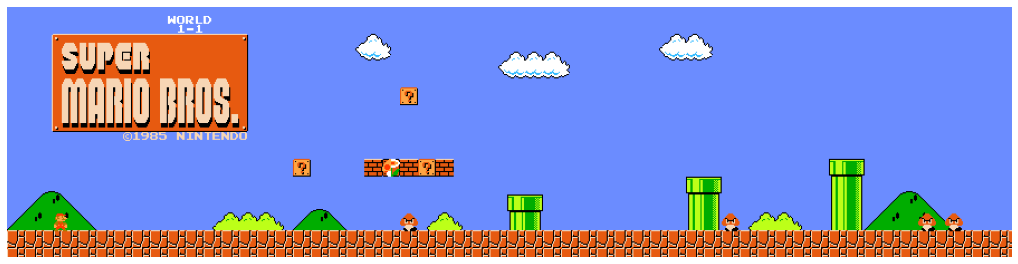

In [ ]:
image = io.imread("http://selmiak.bplaced.net/games/nes/smb/img/1-1.gif")
image = image[:,0:900,:]
plot(image)

In [ ]:
image.shape

(224, 900, 4)

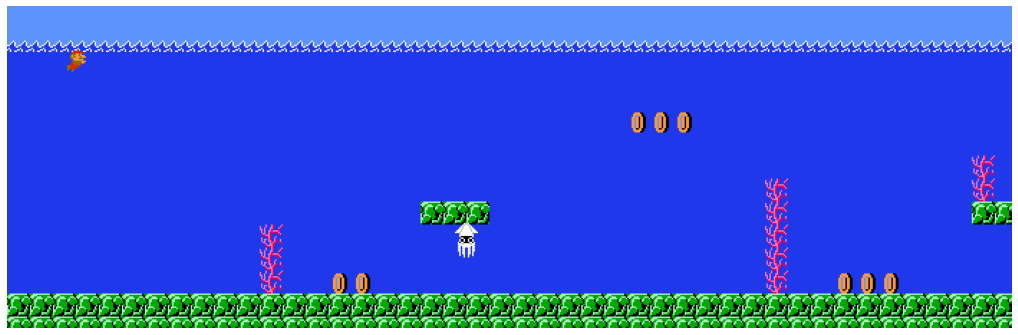

In [ ]:
image = io.imread("http://ian-albert.com/games/super_mario_bros_maps/mario-2-2.gif")
image = image[:,0:700,:]
plot(image)

In [ ]:
coin = image[185:200,224:239,:]

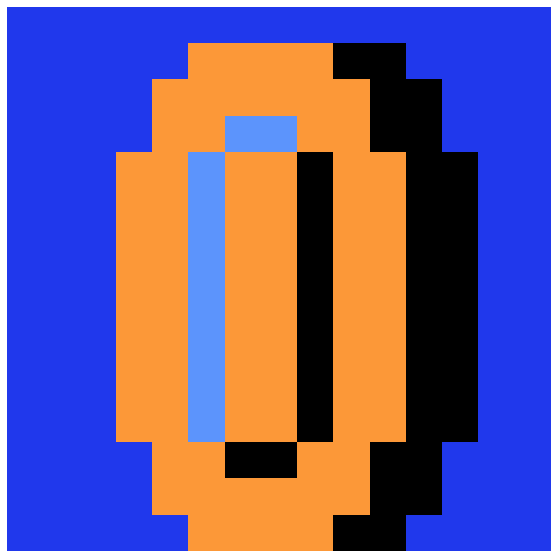

In [ ]:
plot(coin)

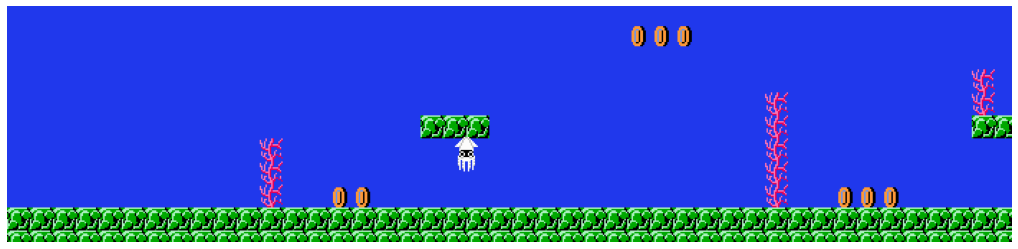

In [ ]:
image = image[60:,0:700,:]
plot(image)

In [ ]:
def scale1(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [ ]:
image=np.mean(image,axis=2)
coin=np.mean(coin,axis=2)

image=scale1(image)
coin=scale1(coin)

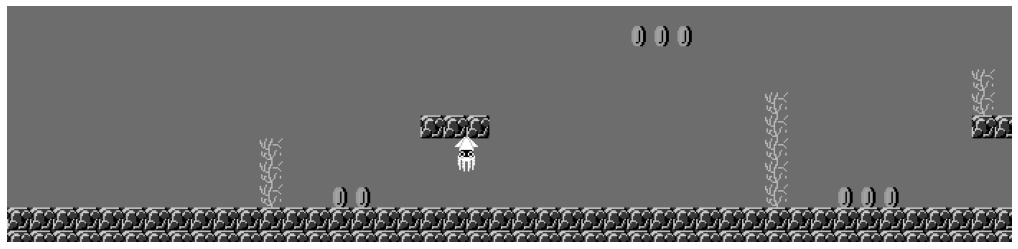

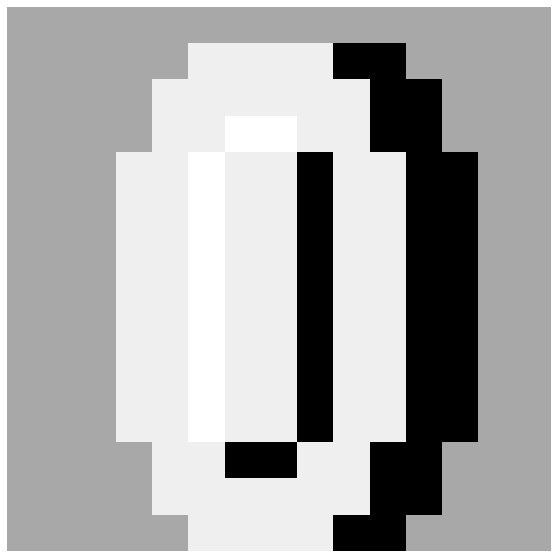

In [ ]:
plot(image)
plot(coin)

In [ ]:
coin.shape

(15, 15)

In [ ]:
image = image - np.mean(image)
coin = coin - np.mean(coin)

In [ ]:
from scipy import signal

In [ ]:
z=signal.convolve2d(image, np.rot90(coin, 2))

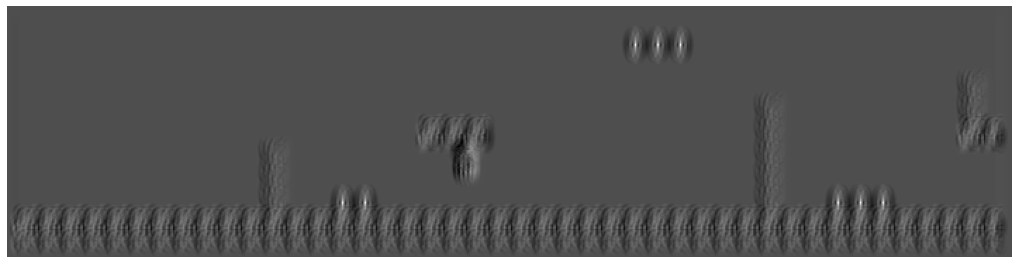

In [ ]:
plot(z)

In [ ]:
np.max(z)

15.261739674892313

In [ ]:
z == np.max(z)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

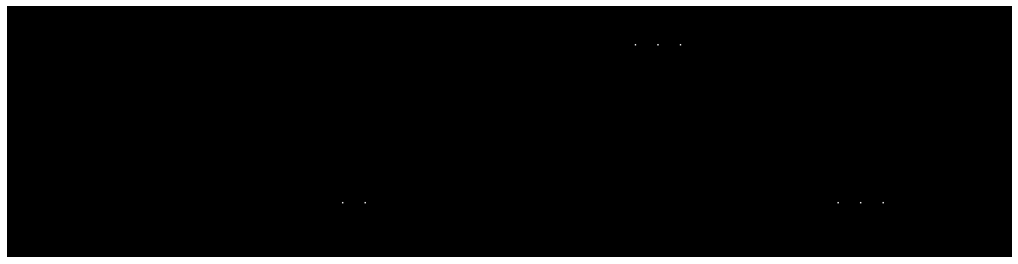

In [ ]:
plot(z==np.max(z))

In [ ]:
[y,x] = np.where(z == np.amax(z))

In [ ]:
y,x

(array([ 27,  27,  27, 139, 139, 139, 139, 139]),
 array([446, 462, 478, 238, 254, 590, 606, 622]))

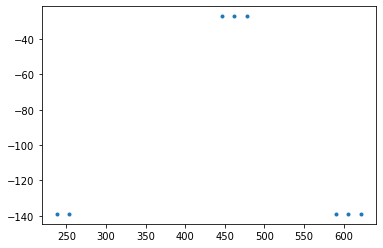

In [ ]:
plt.plot(x,-y,'.')

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(image, cmap = 'gray')
ax.axis('off')
fig.set_size_inches(10, 10)
ax.scatter(x-6, y-6, c='#f97306', s=40) #https://xkcd.com/color/rgb/

plt.show()